<h1 align='center'>Code - Capstone Project - The Battle of Neighborhoods (Week 5)</h1>

<b>1. Importing Libraries

In [1]:
# Primary Libraries

import numpy as np 
import pandas as pd

#Data Scrapping

from bs4 import BeautifulSoup
import requests

#Visulaization: Map

from geopy.geocoders import Nominatim
import folium

#Visulaization: Map Markers

import matplotlib.cm as cm
import matplotlib.colors as colors

#Clustering

from sklearn.cluster import KMeans

#Display

from IPython.display import display 

<b>1. Importing World cities dataset aquired from https://simplemaps.com/data/world-cities

In [2]:
cities=pd.read_csv(r'D:\Datasets\worldcities.csv')
cities.shape

(26569, 11)

In [3]:
cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


<b>2. Taking the City Name as Input. Lets take Mumbai for example

In [4]:
#Either user terminates the loop or finds the city he is looking for

city=input('Input ascii compatible city name with first letter in uppercase: ')
print('Searching for city {} '.format(city))

while (city not in cities['city_ascii'].to_list()):
    print(city)
    print('Name not found in database')
    print('Enter 1 to try again')
    print('Enter 0 to exit')
    aux=int(input())
    if aux==1:
        city=input('Input ascii compatible city name with first letter in uppercase: ')
        print('Searching for city {} '.format(city))
    if aux==0:
        raise KeyboardInterrupt

print('City found')

Input ascii compatible city name with first letter in uppercase: Mumbai
Searching for city Mumbai 
City found


In [5]:
#Obtaining Latitute and Longitute of the target city

idx=cities[cities['city_ascii']==city].index.values

city_latitude = cities.loc[idx[0], 'lat'] # city latitude value
city_longitude = cities.loc[idx[0], 'lng'] # city longitude value

city_name = cities.loc[idx[0], 'city_ascii'] # city name

print('Latitude and longitude values of {} are {}, {}.'.format(city_name, 
                                                               city_latitude, 
                                                               city_longitude))

Latitude and longitude values of Mumbai are 18.9667, 72.8333.


<b>2. Initializing Foursquare Attributes

In [6]:
#Input Four Square Credentials and version you are comfortable with. 

CLIENT_ID = 'NINENEAXWPGNTIEFGUJPDJOO0W1CGFERMDE301S10FCEVYJI' # your Foursquare ID
CLIENT_SECRET = 'KSX1NOK2MJD05IKTDJ2LCIMRC25UVDGJVBWAJUC00MBWCFKP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 50 # A default Foursquare API limit value

<b>3. Getting eateries categorized as food

In [7]:
# Function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [8]:
# Url generation for section food

radius = 5000
section='food'

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city_latitude, 
    city_longitude, 
    radius, 
    LIMIT,
    section)

In [9]:
# Url get request
res = requests.get(url).json()

In [10]:
#res

In [11]:
# Feature Extraction for section food

venues = res['response']['groups'][0]['items']
    
nearby_venues_food = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_food =nearby_venues_food.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_food['venue.categories'] = nearby_venues_food.apply(get_category_type, axis=1)

# clean columns
nearby_venues_food.columns = [col.split(".")[-1] for col in nearby_venues_food.columns]

nearby_venues_food.head()

,name,categories,lat,lng
0,Sarvi,Middle Eastern Restaurant,18.966853,72.829221
1,Jaffer Bhai's Delhi Darbar,Indian Restaurant,18.961417,72.823379
2,Al Rehmani,Indian Restaurant,18.961843,72.831818
3,Shalimar Restaurant,Indian Restaurant,18.958180,72.832367
4,Shree Thaker Bhojnalay,Indian Restaurant,18.951217,72.828326


In [12]:
print('{} venues were returned by Foursquare.'.format(nearby_venues_food.shape[0]))

50 venues were returned by Foursquare.


<b>4. Getting eateries categorized as coffee

In [13]:
#URL Generation for section coffee

radius = 5000
section='coffee'

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city_latitude, 
    city_longitude, 
    radius, 
    LIMIT,
    section)

In [14]:
#URL get request for section coffee

res = requests.get(url).json()

In [15]:
#Feature Extraction for section coffee

venues = res['response']['groups'][0]['items']
    
nearby_venues_cofee = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_cofee =nearby_venues_cofee.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_cofee['venue.categories'] = nearby_venues_cofee.apply(get_category_type, axis=1)

# clean columns
nearby_venues_cofee.columns = [col.split(".")[-1] for col in nearby_venues_cofee.columns]

nearby_venues_cofee.head()

,name,categories,lat,lng
0,Starbucks,Coffee Shop,18.956426,72.812065
1,Kyani & Co.,Café,18.944062,72.828576
2,Starbucks,Coffee Shop,18.932190,72.833959
3,Food for Thought,Café,18.932031,72.831667
4,Le 15 Patisserie,Cupcake Shop,18.995091,72.823735


In [16]:
print('{} venues were returned by Foursquare.'.format(nearby_venues_cofee.shape[0]))

50 venues were returned by Foursquare.


<b>5. Getting eateries categorized as drinks

In [17]:
#URL Generation for section drinks

radius = 5000
section='drinks'

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city_latitude, 
    city_longitude, 
    radius, 
    LIMIT,
    section)

In [18]:
#URL Get request for section drinks

res = requests.get(url).json()

In [19]:
#Feature extraction for section drinks

venues = res['response']['groups'][0]['items']
    
nearby_venues_drinks = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_drinks =nearby_venues_drinks.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_drinks['venue.categories'] = nearby_venues_drinks.apply(get_category_type, axis=1)

# clean columns
nearby_venues_drinks.columns = [col.split(".")[-1] for col in nearby_venues_drinks.columns]

nearby_venues_drinks.head()

,name,categories,lat,lng
0,Tote On The Turf,Nightclub,18.980266,72.820294
1,Gallops,Restaurant,18.981231,72.817178
2,Doolally Taproom,Brewery,18.963809,72.807695
3,The Irish House,Pub,18.994416,72.824721
4,Aer Four Seasons Hotel,Lounge,18.994132,72.820377


In [20]:
print('{} venues were returned by Foursquare.'.format(nearby_venues_drinks.shape[0]))

50 venues were returned by Foursquare.


<b>6. Merging All three Datasets and removing duplicates

In [21]:
#Merging Datasets

nearby_venues=nearby_venues_food.append(nearby_venues_cofee)
nearby_venues=nearby_venues.append(nearby_venues_drinks)

In [22]:
#Removing duplicates due to overlapping categories

nearby_venues=nearby_venues.drop_duplicates()

In [23]:
nearby_venues[:]

,name,categories,lat,lng
0,Sarvi,Middle Eastern Restaurant,18.966853,72.829221
1,Jaffer Bhai's Delhi Darbar,Indian Restaurant,18.961417,72.823379
2,Al Rehmani,Indian Restaurant,18.961843,72.831818
3,Shalimar Restaurant,Indian Restaurant,18.958180,72.832367
4,Shree Thaker Bhojnalay,Indian Restaurant,18.951217,72.828326
...,...,...,...,...
45,The Local,Gastropub,18.929855,72.831383
46,Alps Restaurant & Beer Bar,Bar,18.922578,72.832583
47,Playboy,Nightclub,19.005584,72.826455
48,Café Ideal,Indian Restaurant,18.955732,72.812887


<b>7. One Hot Encoded Dataset for clustering

In [24]:
#Creating a One Hot Encoded Dataset

cluster_df=pd.get_dummies(nearby_venues.drop(['name','lat','lng'],axis=1))

In [25]:
cluster_df

,categories_Asian Restaurant,categories_Athletics & Sports,categories_BBQ Joint,categories_Bakery,categories_Bar,categories_Bengali Restaurant,categories_Brewery,categories_Café,categories_Chinese Restaurant,categories_Cocktail Bar,...,categories_Pizza Place,categories_Pub,categories_Restaurant,categories_Sandwich Place,categories_Seafood Restaurant,categories_Snack Place,categories_Sports Bar,categories_Steakhouse,categories_Vegetarian / Vegan Restaurant,categories_Wine Bar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b>8. Using Kmeans clustering to cluster data points

In [26]:
# set number of clusters
kclusters = nearby_venues.shape[0]//8

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[:] 

array([10,  2,  2,  2,  2,  2,  2,  2,  2,  0, 16, 10,  0,  2,  6,  0, 16,
       15, 15,  0,  6, 14, 14,  2,  0,  0,  2,  0,  6,  0,  2,  0,  2,  0,
        0,  1,  2,  0,  0,  6,  2, 12,  2, 16,  6,  0,  0,  2,  2,  2,  3,
        1,  3,  0,  1,  1,  1,  1,  1, 12,  3,  1,  1,  1,  1, 14,  3,  1,
        3,  3,  1,  3,  3,  1,  0,  1,  0,  3, 12,  1,  1,  3,  0,  3,  1,
        1,  1,  1,  1,  3,  3,  1,  1,  3,  3,  3,  3,  3,  9, 13, 11,  8,
        5,  0,  4,  5,  5,  8,  0,  5,  2,  7,  7,  0, 11,  0, 11,  8,  5,
        7,  0,  5,  9,  5,  8,  5,  8,  0,  5,  0, 13,  5,  0,  5,  8,  4,
        0,  8,  7,  5,  9,  2,  0])

In [27]:
nearby_venues.insert(0, 'Cluster Labels', kmeans.labels_)

<b>9. Using Folium to Visualize Data

In [28]:
map_clusters = folium.Map(location=[city_latitude, city_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name'], nearby_venues['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

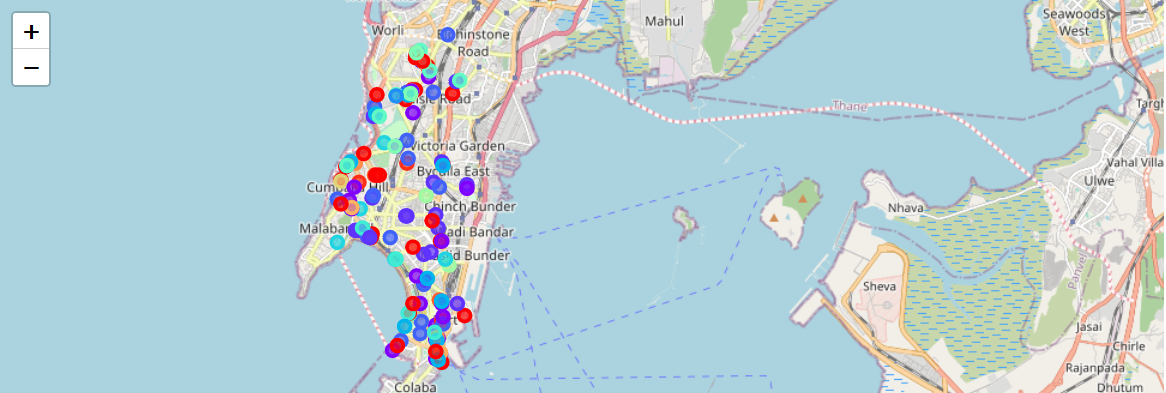

<b>10. Giving user distinct categories of eateries nearby

In [29]:
if kclusters>=1:
    display(nearby_venues.loc[nearby_venues['Cluster Labels'] == 0, 'name':'name'].reset_index().drop('index',axis=1))

,name
0,Mohd Ali Road
1,Vinay Health Home
2,Sukhsagar
3,Cream Centre
4,Haji Tikka
5,Ladu Samrat
6,Oh! Calcutta
7,Gloria Restaurant
8,Jai Hind Lunch Home
9,Francesco's


In [30]:
if kclusters>=2:
    display(nearby_venues.loc[nearby_venues['Cluster Labels'] == 1, 'name':'name'].reset_index().drop('index',axis=1))

,name
0,Food for Thought
1,Kyani & Co.
2,Todi Mill Social
3,Blue Tokai Coffee Roasters
4,Kala Ghoda Café
5,Palladium Social
6,Café Mondegar
7,Cafe Coffee Day
8,Le15 Cafe
9,145 Kala Ghoda


In [31]:
if kclusters>=3:
    display(nearby_venues.loc[nearby_venues['Cluster Labels'] == 2, 'name':'name'].reset_index().drop('index',axis=1))

,name
0,Jaffer Bhai's Delhi Darbar
1,Al Rehmani
2,Shalimar Restaurant
3,Shree Thaker Bhojnalay
4,Swati Snacks
5,Delhi Darbar
6,Bhagat Tarachand Restaurant
7,Afzal Restaurant
8,Sigdi Restaurant
9,The Sahib Room & Kipling Bar


In [32]:
if kclusters>=4:
    display(nearby_venues.loc[nearby_venues['Cluster Labels'] == 3, 'name':'name'].reset_index().drop('index',axis=1))

,name
0,Starbucks
1,Starbucks
2,cafe coffee day
3,Starbucks
4,Cha Bar
5,Starbucks
6,Starbucks
7,Starbucks
8,Cafe Metro
9,Starbucks


In [33]:
if kclusters>=5:
    display(nearby_venues.loc[nearby_venues['Cluster Labels'] == 4, 'name':'name'].reset_index().drop('index',axis=1))

,name
0,Li Bai - St. Regis
1,Café PRATO & Bar


In [34]:
if kclusters>=6:
    display(nearby_venues.loc[nearby_venues['Cluster Labels'] == 5, 'name':'name'].reset_index().drop('index',axis=1))

,name
0,Cafe Renault
1,Asilo - St. Regis
2,Town House Cafe
3,Glocal Junction
4,The Irish House
5,The Ghetto
6,Havana Cafe & Bar
7,Gokul Restaurant and Bar
8,Geoffrey's - The Pub
9,Sunlight Bar


In [35]:
if kclusters>=7:
    display(nearby_venues.loc[nearby_venues['Cluster Labels'] == 6, 'name':'name'].reset_index().drop('index',axis=1))

,name
0,Gallops
1,Palms - Catholic Gymkhana
2,symphony
3,Patel Restaurant
4,The Malabar Hill Club


In [36]:
if kclusters>=8:
    display(nearby_venues.loc[nearby_venues['Cluster Labels'] == 7, 'name':'name'].reset_index().drop('index',axis=1))

,name
0,Catholic Gymkhana
1,Café New York
2,"Long & Short, The GastroBar"
3,The Local


In [37]:
if kclusters>=9:
    display(nearby_venues.loc[nearby_venues['Cluster Labels'] == 8, 'name':'name'].reset_index().drop('index',axis=1))

,name
0,Aer Four Seasons Hotel
1,The Dome
2,The Point Of View
3,Tamasha
4,Summer House Café
5,Doppio Bar & Brasserie
6,Jade Garden


In [38]:
if kclusters>=10:
    display(nearby_venues.loc[nearby_venues['Cluster Labels'] == 9, 'name':'name'].reset_index().drop('index',axis=1))

,name
0,Tote On The Turf
1,Tryst
2,Playboy


In [39]:
if kclusters>=11:
    display(nearby_venues.loc[nearby_venues['Cluster Labels'] == 10, 'name':'name'].reset_index().drop('index',axis=1))

,name
0,Sarvi
1,Gulshan-E-Iran


In [40]:
if kclusters>=12:
    display(nearby_venues.loc[nearby_venues['Cluster Labels'] == 11, 'name':'name'].reset_index().drop('index',axis=1))

,name
0,The Irish House
1,Woodside Inn
2,The Bar Stock Exchange


In [41]:
if kclusters>=13:
    display(nearby_venues.loc[nearby_venues['Cluster Labels'] == 12, 'name':'name'].reset_index().drop('index',axis=1))

,name
0,Mad Over Donuts - Breach Candy
1,Mad Over Donuts
2,Mad Over Donuts


In [42]:
if kclusters>=14:
    display(nearby_venues.loc[nearby_venues['Cluster Labels'] == 13, 'name':'name'].reset_index().drop('index',axis=1))

,name
0,Doolally Taproom
1,Effingut Brewekrz Mumbai


In [43]:
if kclusters>=15:
    display(nearby_venues.loc[nearby_venues['Cluster Labels'] == 14, 'name':'name'].reset_index().drop('index',axis=1))

,name
0,Nature's Basket
1,Indigo Delicatessen
2,The Pantry


In [44]:
if kclusters>=16:
    display(nearby_venues.loc[nearby_venues['Cluster Labels'] == 15, 'name':'name'].reset_index().drop('index',axis=1))

,name
0,Chinese Palace
1,Royal China


In [45]:
if kclusters>=17:
    display(nearby_venues.loc[nearby_venues['Cluster Labels'] == 16, 'name':'name'].reset_index().drop('index',axis=1))

,name
0,Theobroma
1,Celejor
2,Yazdani Bakery


In [46]:
if kclusters>=18:
    display(nearby_venues.loc[nearby_venues['Cluster Labels'] == 17, 'name':'name'].reset_index().drop('index',axis=1))

In [47]:
print('Completed code run successfully')

Completed code run successfully
